In [1]:
using TaylorIntegration, Plots

In [55]:
function p_tilde(t, η, γ, n)
    cos(2t) + γ * cos(n * t)
end

function mathieu!(du, u, p, t)
    α, β, η, γ, n = p
    du[1] = u[2]
    du[2] = -(α + β * p_tilde(t, η, γ, n)*t) * u[1]
end

mathieu! (generic function with 1 method)

In [56]:
order = 15
abstol = 1e-20

1.0e-20

In [57]:
u = [1.0, 0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [60]:
α_range = -6:0.1:6
β_range = -6:0.1:6
η = 1 
γ = 0.5 
n = 2  

2

In [61]:
stability_map = zeros(length(α_range), length(β_range))

121×121 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [62]:
for (i, α) in enumerate(α_range)
    for (j, β) in enumerate(β_range)
        t, q = taylorinteg(mathieu!, u, 0.0, 2π, 15, 1.0e-15, (α, β, η, γ, n))
        
        if maximum(abs.(q[:,1])) > 1e3
            stability_map[i, j] = 1
        else
            stability_map[i, j] = 0
        end
    end
end

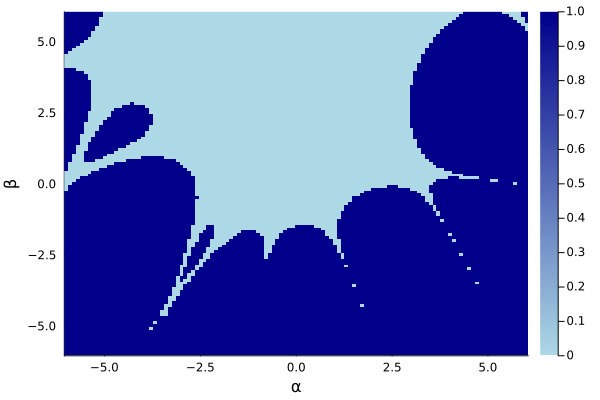

In [65]:
heatmap(α_range, β_range, stability_map, xlabel="α", ylabel="β", color=:blues)

In [44]:
varorder = 8
ξ = set_variables("ξ", numvars=2, order=varorder)
q0TN = u .+ ξ


2-element Vector{TaylorN{Float64}}:
  1.0 + 1.0 ξ₁ + 𝒪(‖x‖⁹)
        1.0 ξ₂ + 𝒪(‖x‖⁹)

In [45]:
tt, rr = taylorinteg(mathieu!, q0TN, 0, 2π, 15, 1.0e-15, (0.1, 0.1, η, γ, n))

([0.0, 0.22745875766141924, 0.46506787769335084, 0.7038591776628457, 0.9347214872976014, 1.178929160942047, 1.4265651165711788, 1.6646049579307842, 1.9133369381704446, 2.169524099435563  …  4.349374163271925, 4.581444646560284, 4.816570082654254, 5.067896849300165, 5.292008071089921, 5.513350831560584, 5.753568429804657, 5.971189806327666, 6.1852067054845685, 6.283185307179586], TaylorN{Float64}[ 1.0 + 1.0 ξ₁ + 𝒪(‖x‖⁹)  1.0 ξ₂ + 𝒪(‖x‖⁹);  0.9935729689718533 + 0.9935729689718533 ξ₁ + 0.22697326768471043 ξ₂ + 𝒪(‖x‖⁹)  - 0.05616095294062125 - 0.05616095294062125 ξ₁ + 0.9936391144138982 ξ₂ + 𝒪(‖x‖⁹); … ;  - 0.46668106810782684 - 0.46668106810782684 ξ₁ + 3.994085851453951 ξ₂ + 𝒪(‖x‖⁹)  - 0.2049122980731715 - 0.2049122980731715 ξ₁ - 0.38905089982154845 ξ₂ + 𝒪(‖x‖⁹);  - 0.48619178836944715 - 0.48619178836944715 ξ₁ + 3.951204335591768 ξ₂ + 𝒪(‖x‖⁹)  - 0.19326197282271232 - 0.19326197282271232 ξ₁ - 0.4861917883694466 ξ₂ + 𝒪(‖x‖⁹)])

In [46]:
rr

28×2 view(transpose(view(::Matrix{TaylorN{Float64}}, :, 1:28)), 1:28, :) with eltype TaylorN{Float64}:
                                                            1.0 + 1.0 ξ₁ + 𝒪(‖x‖⁹)  …                                                                    1.0 ξ₂ + 𝒪(‖x‖⁹)
     0.9935729689718533 + 0.9935729689718533 ξ₁ + 0.22697326768471043 ξ₂ + 𝒪(‖x‖⁹)       - 0.05616095294062125 - 0.05616095294062125 ξ₁ + 0.9936391144138982 ξ₂ + 𝒪(‖x‖⁹)
      0.9736507810334282 + 0.9736507810334282 ξ₁ + 0.4610461652112404 ξ₂ + 𝒪(‖x‖⁹)       - 0.11044303371387806 - 0.11044303371387806 ξ₁ + 0.9747649581552958 ξ₂ + 𝒪(‖x‖⁹)
       0.9415490070619252 + 0.9415490070619252 ξ₁ + 0.690626531393874 ξ₂ + 𝒪(‖x‖⁹)        - 0.15683213960537018 - 0.15683213960537018 ξ₁ + 0.947043177492956 ξ₂ + 𝒪(‖x‖⁹)
      0.9010981237683682 + 0.9010981237683682 ξ₁ + 0.9057911311335932 ξ₂ + 𝒪(‖x‖⁹)         - 0.1919343195629292 - 0.1919343195629292 ξ₁ + 0.9168231225749429 ξ₂ + 𝒪(‖x‖⁹)
        0.850780211355005 + 0.850780211355005 ξ

In [47]:
u0 = [1.0, 0.0]
params = [0.1, 0.1, η, γ, n]  
paramTN = [params[1] + ξ[1], params[2] + ξ[2], params[3], params[4], params[5]]


5-element Vector{TaylorN{Float64}}:
  0.1 + 1.0 ξ₁ + 𝒪(‖x‖⁹)
  0.1 + 1.0 ξ₂ + 𝒪(‖x‖⁹)
           1.0 + 𝒪(‖x‖¹)
           0.5 + 𝒪(‖x‖¹)
           2.0 + 𝒪(‖x‖¹)

In [54]:
tt, rr = taylorinteg(mathieu!, u0, paramTN, 0, 2π, 15, 1.0e-15)

MethodError: MethodError: no method matching taylorinteg(::typeof(mathieu!), ::Vector{Float64}, ::Vector{TaylorN{Float64}}, ::Int64, ::Float64, ::Int64, ::Float64)

Closest candidates are:
  taylorinteg(::Any, ::Vector{U}, !Matched::AbstractVector{T}, ::Int64, ::T, ::Any; maxsteps, parse_eqs) where {T<:Real, U<:Number}
   @ TaylorIntegration ~/.julia/packages/TaylorIntegration/Vtu13/src/integrator.jl:815
  taylorinteg(::Any, ::Vector{S}, !Matched::AbstractVector{T}, ::Int64, ::U, ::Any; maxsteps, parse_eqs) where {S<:Number, T<:Real, U<:Real}
   @ TaylorIntegration ~/.julia/packages/TaylorIntegration/Vtu13/src/integrator.jl:993
  taylorinteg(::Any, ::Vector{S}, !Matched::T, ::U, !Matched::Int64, ::V, ::Any; maxsteps, parse_eqs) where {S<:Number, T<:Real, U<:Real, V<:Real}
   @ TaylorIntegration ~/.julia/packages/TaylorIntegration/Vtu13/src/integrator.jl:978
  ...
